# CME 193 - Lecture 4

- Random numbers and histograms
- Power method walkthrough
- Linear algebra functions


## Random numbers

see [the documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)

* `rng.rand(d0,d1,...,dn)`, Random values in a given shape
* `rng.randn(d0, d1, ...,dn)`, Random standard normal
* `rng.randint(lo, hi, size)`, Random integers `[lo, hi)`
* `rng.choice(a, size, repl, p)`, Sample from a
* `rng.shuffle(a)`, Permutation (in-place)
* `rng.permutation(a)`, Permutation (new array)
* Also, have parameterized distributions: `beta`, `binomial`, `chisquare`, `exponential`, `dirichlet`, `gamma`, `laplace`, `lognormal`, `pareto`, `poisson`, `power`...

In [ ]:
import numpy.random as rng

In [ ]:
rng.randint(-10,10)

In [ ]:
rng.choice?

### Histograms

In [ ]:
x1 = rng.normal(2,3,1000)
x2 = rng.normal(1,5,1000)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(x1);

In [ ]:
plt.hist(x1,histtype='step')
plt.hist(x2,histtype='step')

In [ ]:
plt.hist(x1,bins=100);

In [ ]:
plt.hist2d(x1,x2);

## Power method

Power method is an algorithm for finding the largest eigenpair of a matrix.  We'll assume that we're working with symmetric/hermitian matrices for simplicity.  Recall the largest eigenvector of a matrix $A$ solves the variational problem:
$$\max_{\|v\|_2 = 1} v^T A v$$
The eigenvalue is the value $\lambda = v^T A v$.
* generate a random symmetric matrix (however you like).
* Find the largest eigenpair using the power method
* Compare the answer with what you would get from numpy.linalg.eigh

The power method uses iterated matrix-vector multiplication to find the largest magnitude eigenvalue of $A$.  
```
    input) A: an n x n symmetric matrix
    outputs) l: the eigenvalue with the largest absolute value
             v: the corresponding eigenvector

    v <- random vector of length n
    while l has not converged:
        v <- A v
        v <- v / ||v||_2
        l <- v^T A v
```

turn the above pseudo-code into a python function that implements power method. How does the result compare to `eigh`?

# Linear Algebra in NumPy

We'll start with 
```python
import numpy.linalg as la
```
`numpy` is the *package*.  `linalg` is a *module* in the package.

In [ ]:
import numpy.linalg as la

You can find a full list of available operations/decompositions in [the documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html)

* `la.eye(3)`, Identity matrix
* `la.trace(A)`, Trace
* `la.column_stack((A,B))`, Stack column wise
* `la.row_stack((A,B,A))`, Stack row wise
* `la.qr`, Computes the QR decomposition
* `la.cholesky`, Computes the Cholesky decomposition
* `la.inv(A)`, Inverse
* `la.solve(A,b)`, Solves $Ax = b$ for $A$ full rank
* `la.lstsq(A,b)`, Solves $\arg\min_x \|Ax-b\|_2$
* `la.eig(A)`, Eigenvalue decomposition
* `la.eigh(A)`, Eigenvalue decomposition for
symmetric or hermitian
* `la.eigvals(A)`, Computes eigenvalues.
* `la.svd(A, full)`, Singular value decomposition
* `la.pinv(A)`, Computes pseudo-inverse of A

In [ ]:
# example of SVD
A = np.random.normal(0, 1, (2,3))
U, S, V = la.svd(A)
print("A  = \n", A)
print("U = \n", U)
print("S = \n", S)
print("V = \n", V)

In [11]:
A = np.arange(0, 4, 1.0).reshape(2,2)
x = np.array([1.0,2.0])
b = A@x 
# x2 <- A \ b
x2 = la.solve(A,b)

print("A = \n",A)
print("x = \n", x)
print("b = \n", b)
print("x2 = \n", x2)

A = 
 [[0. 1.]
 [2. 3.]]
x = 
 [1. 2.]
b = 
 [2. 8.]
x2 = 
 [1. 2.]


# Exercise

Generate a 100 by 10 matrix `A = np.random.randn(100,10)` and a vector `b = np.random.rand(100)`. Implement the [Richardson iteration](https://en.wikipedia.org/wiki/Modified_Richardson_iteration) to solve the least-squares problem `|A*x-b|_2^2`. Some pseudocode for this is below:

```
    input) A: an m x n matrix, b: a m x 1 vector
    outputs) x: n x 1 vector minimizing |A*x-b|_2^2.

    x <- all-zeros vector
    steplength = 0.01 
    while x has not converged:
        residual <- b - A*x
        x <- x + steplength*residual
```

Compare your solution to numpy's built-in `lstsq` function.

We now have the groundwork that we will build on in the rest of the class. We'll conclude class with a demonstration of the power of numpy and scipy as a taster for the rest of the class.

## PCA with numpy

[Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is a very common tool in data science to extract the most relevant features of a dataset. We can implement this in numpy very easily via the SVD. (This demo is taken from the numpy documentation [here](https://numpy.org/doc/1.19/user/tutorial-svd.html)).

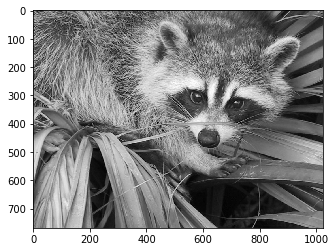

In [18]:
from scipy import misc

img = misc.face()/255
import matplotlib.pyplot as plt
img_gray = img @ [0.2126, 0.7152, 0.0722]
plt.imshow(img_gray, cmap="gray")

Consider the image above (actually a numpy array). We will attempt to 'compress' it via the SVD.

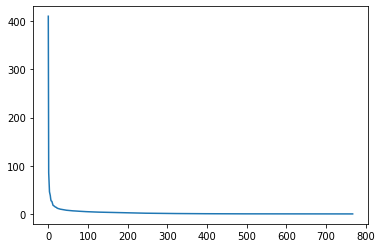

In [22]:
U, s, Vt = la.svd(img_gray)
S = np.diag(s)
plt.plot(s)

The singular values of a matrix represent how 'important' a certain set of vectors is to forming the full matrix. We see here that only a very small number of vectors have large singular value.

(768,)


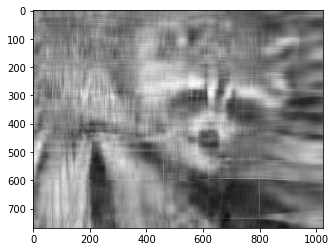

In [36]:
print(s.shape) 
k = 10
compressed = U[:,:k] @ S[:k,:k] @ Vt[:k,:]
plt.imshow(compressed, cmap="gray")

As we see, with only 10 vectors we are able to construct a (very blurry) representation of the image. In general, singular value decomposition can be very helpful for extracting generalities of a dataset.